# Analyze Visium fluorescence data

In [1]:
%matplotlib inline

In [2]:
!pip install --q squidpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import anndata as ad
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13
squidpy==1.6.0


  0%|          | 0.00/303M [00:00<?, ?B/s]

  0%|          | 0.00/65.5M [00:00<?, ?B/s]

In [4]:
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata.to_df()

Xkr4   Gm19938  Sox17    Mrpl15    Lypla1     Tcea1  \
AAACGAGACGGTTGAT-1   0.0  0.000000    0.0  0.000000  0.784930  1.219208   
AAAGGGATGTAGCAAG-1   0.0  0.000000    0.0  0.000000  0.000000  0.000000   
AAATGGCATGTCTTGT-1   0.0  0.000000    0.0  0.000000  0.000000  0.000000   
AAATGGTCAATGTGCC-1   0.0  0.000000    0.0  1.022259  0.000000  1.695371   
AAATTAACGGGTAGCT-1   0.0  0.000000    0.0  1.379656  0.000000  0.000000   
...                  ...       ...    ...       ...       ...       ...   
TTGTCGTTCAGTTACC-1   0.0  0.000000    0.0  0.000000  0.000000  0.000000   
TTGTGGCCCTGACAGT-1   0.0  0.000000    0.0  0.915695  0.000000  1.177967   
TTGTTAGCAAATTCGA-1   0.0  0.000000    0.0  0.570498  0.931493  0.570498   
TTGTTCAGTGTGCTAC-1   0.0  0.000000    0.0  0.000000  0.000000  0.000000   
TTGTTGTGTGTCAAGA-1   0.0  0.801643    0.0  0.000000  0.000000  0.000000   

                      Rgs20   Atp6v1h  Oprk1  Npbwr1  ...    mt-Nd5    mt-Nd6  \
AAACGAGACGGTTGAT-1  0.00000  1.940362    0.0     0.0  ...  2.938305  0.784930   
AAAGGGATGTAGCAAG-1  0.00000  1.297566    0.0     0.0  ...  2.705846  0.000000   
AAATGGCATGTCTTGT-1  0.00000  1.496025    0.0     0.0  ...  2.698380  0.000000   
AAATGGTCAATGTGCC-1  0.00000  1.022259    0.0     0.0  ...  1.299973  0.000000   
AAATTAACGGGTAGCT-1  0.00000  1.379656    0.0     0.0  ...  3.358741  1.092713   
...                     ...       ...    ...     ...  ...       ...       ...   
TTGTCGTTCAGTTACC-1  0.00000  0.000000    0.0     0.0  ...  2.058543  0.000000   
TTGTGGCCCTGACAGT-1  0.55919  0.559190    0.0     0.0  ...  2.943498  0.000000   
TTGTTAGCAAATTCGA-1  0.00000  0.931493    0.0     0.0  ...  2.162343  0.570498   
TTGTTCAGTGTGCTAC-1  0.00000  0.822601    0.0     0.0  ...  3.702999  0.822601   
TTGTTGTGTGTCAAGA-1  0.00000  0.000000    0.0     0.0  ...  3.333719  0.000000   

                     mt-Cytb  CAAA01118383.1     Vamp7     Spry3  Tmlhe  \
AAACGAGACGGTTGAT-1  4.779402        0.000000  0.000000  0.000000    0.0   
AAAGGGATGTAGCAAG-1  4.192367        0.000000  0.509882  0.509882    0.0   
AAATGGCATGTCTTGT-1  4.503900        0.000000  0.000000  0.526373    0.0   
AAATGGTCAATGTGCC-1  4.147590        0.636436  0.636436  0.000000    0.0   
AAATTAACGGGTAGCT-1  5.008477        0.000000  0.000000  0.000000    0.0   
...                      ...             ...       ...       ...    ...   
TTGTCGTTCAGTTACC-1  4.419016        0.000000  0.000000  0.000000    0.0   
TTGTGGCCCTGACAGT-1  4.476355        0.000000  0.000000  0.000000    0.0   
TTGTTAGCAAATTCGA-1  4.449759        0.000000  0.000000  0.000000    0.0   
TTGTTCAGTGTGCTAC-1  5.155115        0.000000  0.000000  0.000000    0.0   
TTGTTGTGTGTCAAGA-1  4.670127        0.000000  0.801643  0.000000    0.0   

                    4933409K07Rik  CAAA01147332.1  AC149090.1  
AAACGAGACGGTTGAT-1            0.0             0.0    1.219208  
AAAGGGATGTAGCAAG-1            0.0             0.0    1.843838  
AAATGGCATGTCTTGT-1            0.0             0.0    1.496025  
AAATGGTCAATGTGCC-1            0.0             0.0    1.022259  
AAATTAACGGGTAGCT-1            0.0             0.0    0.000000  
...                           ...             ...         ...  
TTGTCGTTCAGTTACC-1            0.0             0.0    0.861585  
TTGTGGCCCTGACAGT-1            0.0             0.0    1.385549  
TTGTTAGCAAATTCGA-1            0.0             0.0    1.725422  
TTGTTCAGTGTGCTAC-1            0.0             0.0    1.267743  
TTGTTGTGTGTCAAGA-1            0.0             0.0    0.801643  

[704 rows x 16562 columns]

In [8]:
img

ImageContainer[shape=(7272, 7272), layers=['image']]

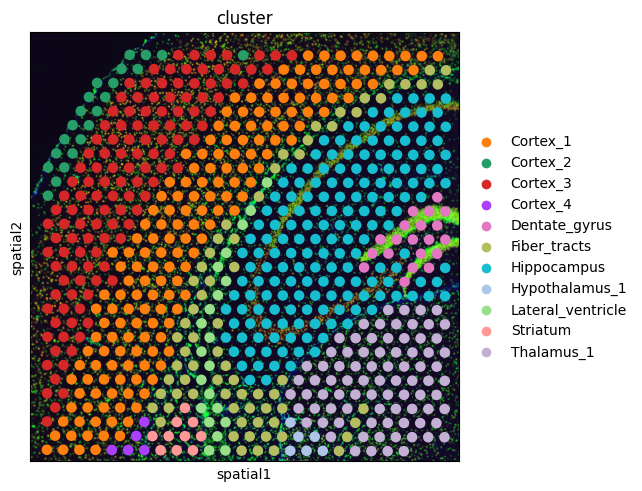

In [10]:
sq.pl.spatial_scatter(adata, color="cluster")

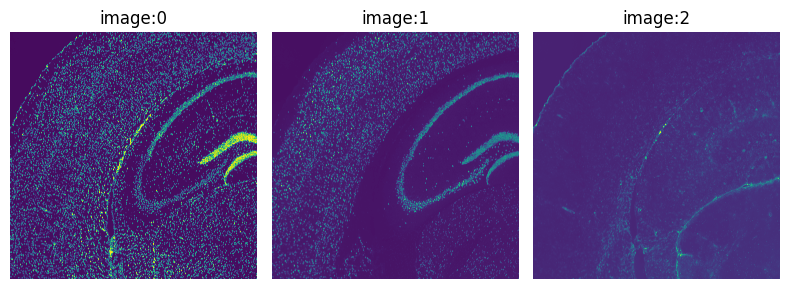

In [12]:
img.show(channelwise=True)

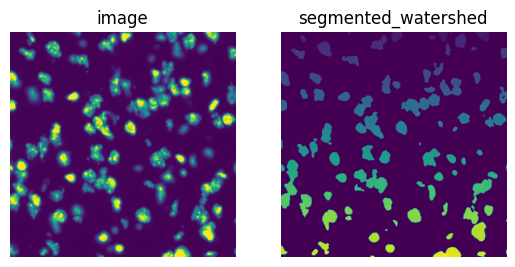

In [13]:
sq.im.process(
    img=img,
    layer="image",
    method="smooth",
)

sq.im.segment(img=img, layer="image_smooth", method="watershed", channel=0, chunks=1000)

# plot the resulting segmentation
fig, ax = plt.subplots(1, 2)
img_crop = img.crop_corner(2000, 2000, size=500)
img_crop.show(layer="image", channel=0, ax=ax[0])
img_crop.show(
    layer="segmented_watershed",
    channel=0,
    ax=ax[1],
)

  0%|          | 0/704 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


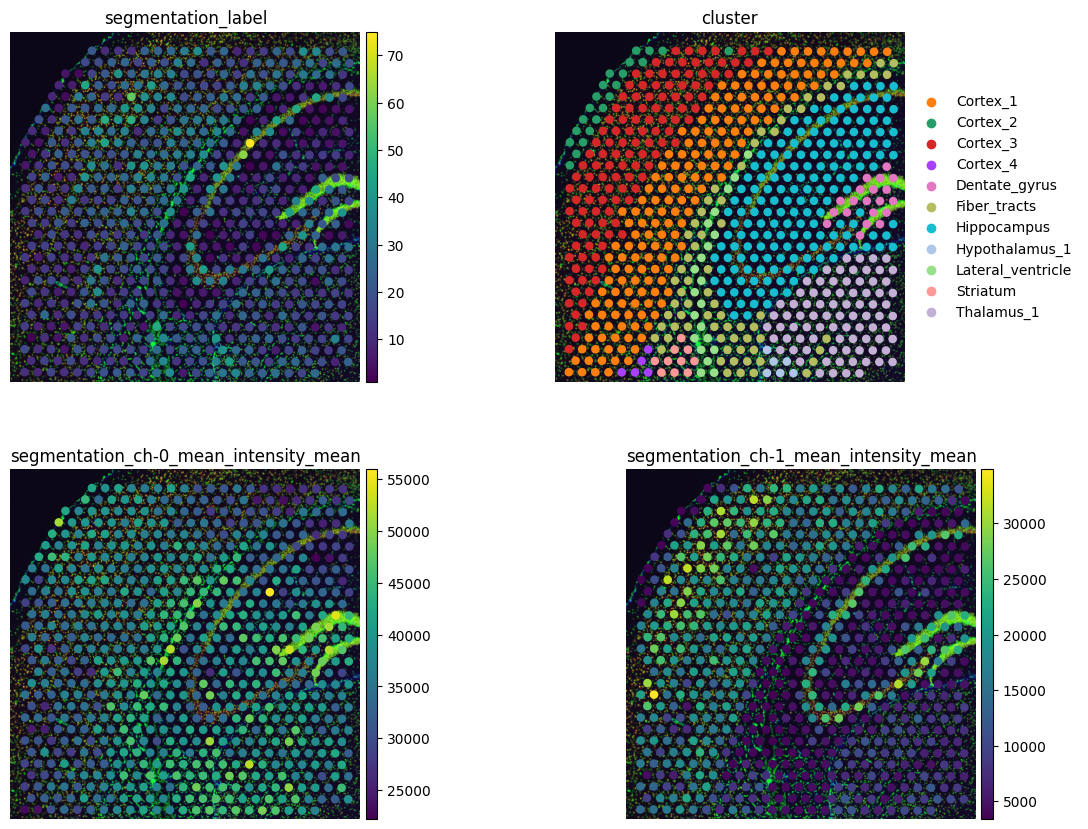

In [14]:
# define image layer to use for segmentation
features_kwargs = {"segmentation": {"label_layer": "segmented_watershed"}}
# calculate segmentation features
sq.im.calculate_image_features(
    adata,
    img,
    features="segmentation",
    layer="image",
    key_added="features_segmentation",
    n_jobs=1,
    features_kwargs=features_kwargs,
)
# plot results and compare with gene-space clustering
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "features_segmentation"),
    color=[
        "segmentation_label",
        "cluster",
        "segmentation_ch-0_mean_intensity_mean",
        "segmentation_ch-1_mean_intensity_mean",
    ],
    frameon=False,
    ncols=2,
)

In [15]:
# define different feature calculation combinations
params = {
    # all features, corresponding only to tissue underneath spot
    "features_orig": {
        "features": ["summary", "texture", "histogram"],
        "scale": 1.0,
        "mask_circle": True,
    },
    # summary and histogram features with a bit more context, original resolution
    "features_context": {"features": ["summary", "histogram"], "scale": 1.0},
    # summary and histogram features with more context and at lower resolution
    "features_lowres": {"features": ["summary", "histogram"], "scale": 0.25},
}

for feature_name, cur_params in params.items():
    # features will be saved in `adata.obsm[feature_name]`
    sq.im.calculate_image_features(
        adata, img, layer="image", key_added=feature_name, n_jobs=1, **cur_params
    )

# combine features in one dataframe
adata.obsm["features"] = pd.concat(
    [adata.obsm[f] for f in params.keys()], axis="columns"
)

# make sure that we have no duplicated feature names in the combined table
adata.obsm["features"].columns = ad.utils.make_index_unique(
    adata.obsm["features"].columns
)

  0%|          | 0/704 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/704 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/704 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [16]:
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'features_segmentation', 'features_orig', 'features_context', 'features_lowres', 'features'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [20]:
adata.obsm["features_segmentation"].head()

segmentation_label  segmentation_area_mean  \
AAACGAGACGGTTGAT-1                  13              305.846154   
AAAGGGATGTAGCAAG-1                  30               68.133333   
AAATGGCATGTCTTGT-1                  25              160.960000   
AAATGGTCAATGTGCC-1                  14              227.785714   
AAATTAACGGGTAGCT-1                   9              238.111111   

                    segmentation_area_std  \
AAACGAGACGGTTGAT-1             319.319191   
AAAGGGATGTAGCAAG-1              51.885601   
AAATGGCATGTCTTGT-1             162.447156   
AAATGGTCAATGTGCC-1             172.274772   
AAATTAACGGGTAGCT-1             217.461846   

                    segmentation_ch-0_mean_intensity_mean  \
AAACGAGACGGTTGAT-1                           42433.260384   
AAAGGGATGTAGCAAG-1                           44944.161403   
AAATGGCATGTCTTGT-1                           28793.322092   
AAATGGTCAATGTGCC-1                           38388.930380   
AAATTAACGGGTAGCT-1                           38295.560915   

                    segmentation_ch-0_mean_intensity_std  \
AAACGAGACGGTTGAT-1                           9884.597383   
AAAGGGATGTAGCAAG-1                          11977.009383   
AAATGGCATGTCTTGT-1                           5197.080866   
AAATGGTCAATGTGCC-1                           8760.285480   
AAATTAACGGGTAGCT-1                          10868.043866   

                    segmentation_ch-1_mean_intensity_mean  \
AAACGAGACGGTTGAT-1                            7118.463335   
AAAGGGATGTAGCAAG-1                           12770.837349   
AAATGGCATGTCTTGT-1                           12959.801267   
AAATGGTCAATGTGCC-1                            3712.592167   
AAATTAACGGGTAGCT-1                            9168.584853   

                    segmentation_ch-1_mean_intensity_std  \
AAACGAGACGGTTGAT-1                           4064.666472   
AAAGGGATGTAGCAAG-1                          12076.933493   
AAATGGCATGTCTTGT-1                          10015.528209   
AAATGGTCAATGTGCC-1                            376.969543   
AAATTAACGGGTAGCT-1                           8199.290747   

                    segmentation_ch-2_mean_intensity_mean  \
AAACGAGACGGTTGAT-1                            9250.210490   
AAAGGGATGTAGCAAG-1                            9756.579295   
AAATGGCATGTCTTGT-1                            7660.600482   
AAATGGTCAATGTGCC-1                            9607.621828   
AAATTAACGGGTAGCT-1                            9628.439237   

                    segmentation_ch-2_mean_intensity_std  
AAACGAGACGGTTGAT-1                            636.827898  
AAAGGGATGTAGCAAG-1                           1214.821834  
AAATGGCATGTCTTGT-1                            777.840491  
AAATGGTCAATGTGCC-1                           1393.330975  
AAATTAACGGGTAGCT-1                           2555.585186

In [21]:
adata.obsm["features"].head()

histogram_ch-0_bin-0  histogram_ch-0_bin-1  \
AAACGAGACGGTTGAT-1                 27158                  1100   
AAAGGGATGTAGCAAG-1                 29686                   556   
AAATGGCATGTCTTGT-1                 25070                  2936   
AAATGGTCAATGTGCC-1                 26140                  1370   
AAATTAACGGGTAGCT-1                 28855                   832   

                    histogram_ch-0_bin-2  histogram_ch-0_bin-3  \
AAACGAGACGGTTGAT-1                   539                   500   
AAAGGGATGTAGCAAG-1                   268                   180   
AAATGGCATGTCTTGT-1                  1333                   789   
AAATGGTCAATGTGCC-1                  1131                  1047   
AAATTAACGGGTAGCT-1                   527                   325   

                    histogram_ch-0_bin-4  histogram_ch-0_bin-5  \
AAACGAGACGGTTGAT-1                   407                   349   
AAAGGGATGTAGCAAG-1                   139                    99   
AAATGGCATGTCTTGT-1                   562                   367   
AAATGGTCAATGTGCC-1                   784                   610   
AAATTAACGGGTAGCT-1                   240                   314   

                    histogram_ch-0_bin-6  histogram_ch-0_bin-7  \
AAACGAGACGGTTGAT-1                   330                   303   
AAAGGGATGTAGCAAG-1                    83                    99   
AAATGGCATGTCTTGT-1                   374                   388   
AAATGGTCAATGTGCC-1                   420                   305   
AAATTAACGGGTAGCT-1                   265                   168   

                    histogram_ch-0_bin-8  histogram_ch-0_bin-9  ...  \
AAACGAGACGGTTGAT-1                   230                  1125  ...   
AAAGGGATGTAGCAAG-1                   106                   825  ...   
AAATGGCATGTCTTGT-1                   176                    46  ...   
AAATGGTCAATGTGCC-1                   163                    71  ...   
AAATTAACGGGTAGCT-1                    93                   422  ...   

                    summary_ch-1_quantile-0.9-2  summary_ch-1_quantile-0.5-2  \
AAACGAGACGGTTGAT-1                       5144.6                       4497.0   
AAAGGGATGTAGCAAG-1                       5712.2                       4797.0   
AAATGGCATGTCTTGT-1                      13580.0                       4982.0   
AAATGGTCAATGTGCC-1                       3546.0                       3368.0   
AAATTAACGGGTAGCT-1                       5344.4                       4244.0   

                    summary_ch-1_quantile-0.1-2  summary_ch-1_mean-2  \
AAACGAGACGGTTGAT-1                       4313.4          4901.037531   
AAAGGGATGTAGCAAG-1                       4419.0          5531.610370   
AAATGGCATGTCTTGT-1                       4243.0          7481.725432   
AAATGGTCAATGTGCC-1                       3304.0          3401.124938   
AAATTAACGGGTAGCT-1                       4062.0          5261.260741   

                    summary_ch-1_std-2  summary_ch-2_quantile-0.9-2  \
AAACGAGACGGTTGAT-1         1583.393016                       9360.0   
AAAGGGATGTAGCAAG-1         3572.221460                      10929.6   
AAATGGCATGTCTTGT-1         6574.047423                       8309.6   
AAATGGTCAATGTGCC-1          123.463946                       9899.8   
AAATTAACGGGTAGCT-1         4247.731816                       9727.2   

                    summary_ch-2_quantile-0.5-2  summary_ch-2_quantile-0.1-2  \
AAACGAGACGGTTGAT-1                       9078.0                       8848.0   
AAAGGGATGTAGCAAG-1                       8994.0                       8188.8   
AAATGGCATGTCTTGT-1                       7251.0                       6895.0   
AAATGGTCAATGTGCC-1                       7382.0                       7107.4   
AAATTAACGGGTAGCT-1                       8469.0                       8082.4   

                    summary_ch-2_mean-2  summary_ch-2_std-2  
AAACGAGACGGTTGAT-1          9133.606914          432.537450  
AAAGGGATGTAGCAAG-1          9332.676049         1217.633362

In [22]:
def cluster_features(features: pd.DataFrame, like=None):
    """
    Calculate leiden clustering of features.

    Specify filter of features using `like`.
    """
    # filter features
    if like is not None:
        features = features.filter(like=like)
    # create temporary adata to calculate the clustering
    adata = ad.AnnData(features)
    # important - feature values are not scaled, so need to scale them before PCA
    sc.pp.scale(adata)
    # calculate leiden clustering
    sc.pp.pca(adata, n_comps=min(10, features.shape[1] - 1))
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata)

    return adata.obs["leiden"]

<ipython-input-22-2cd7e02565df>:17: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


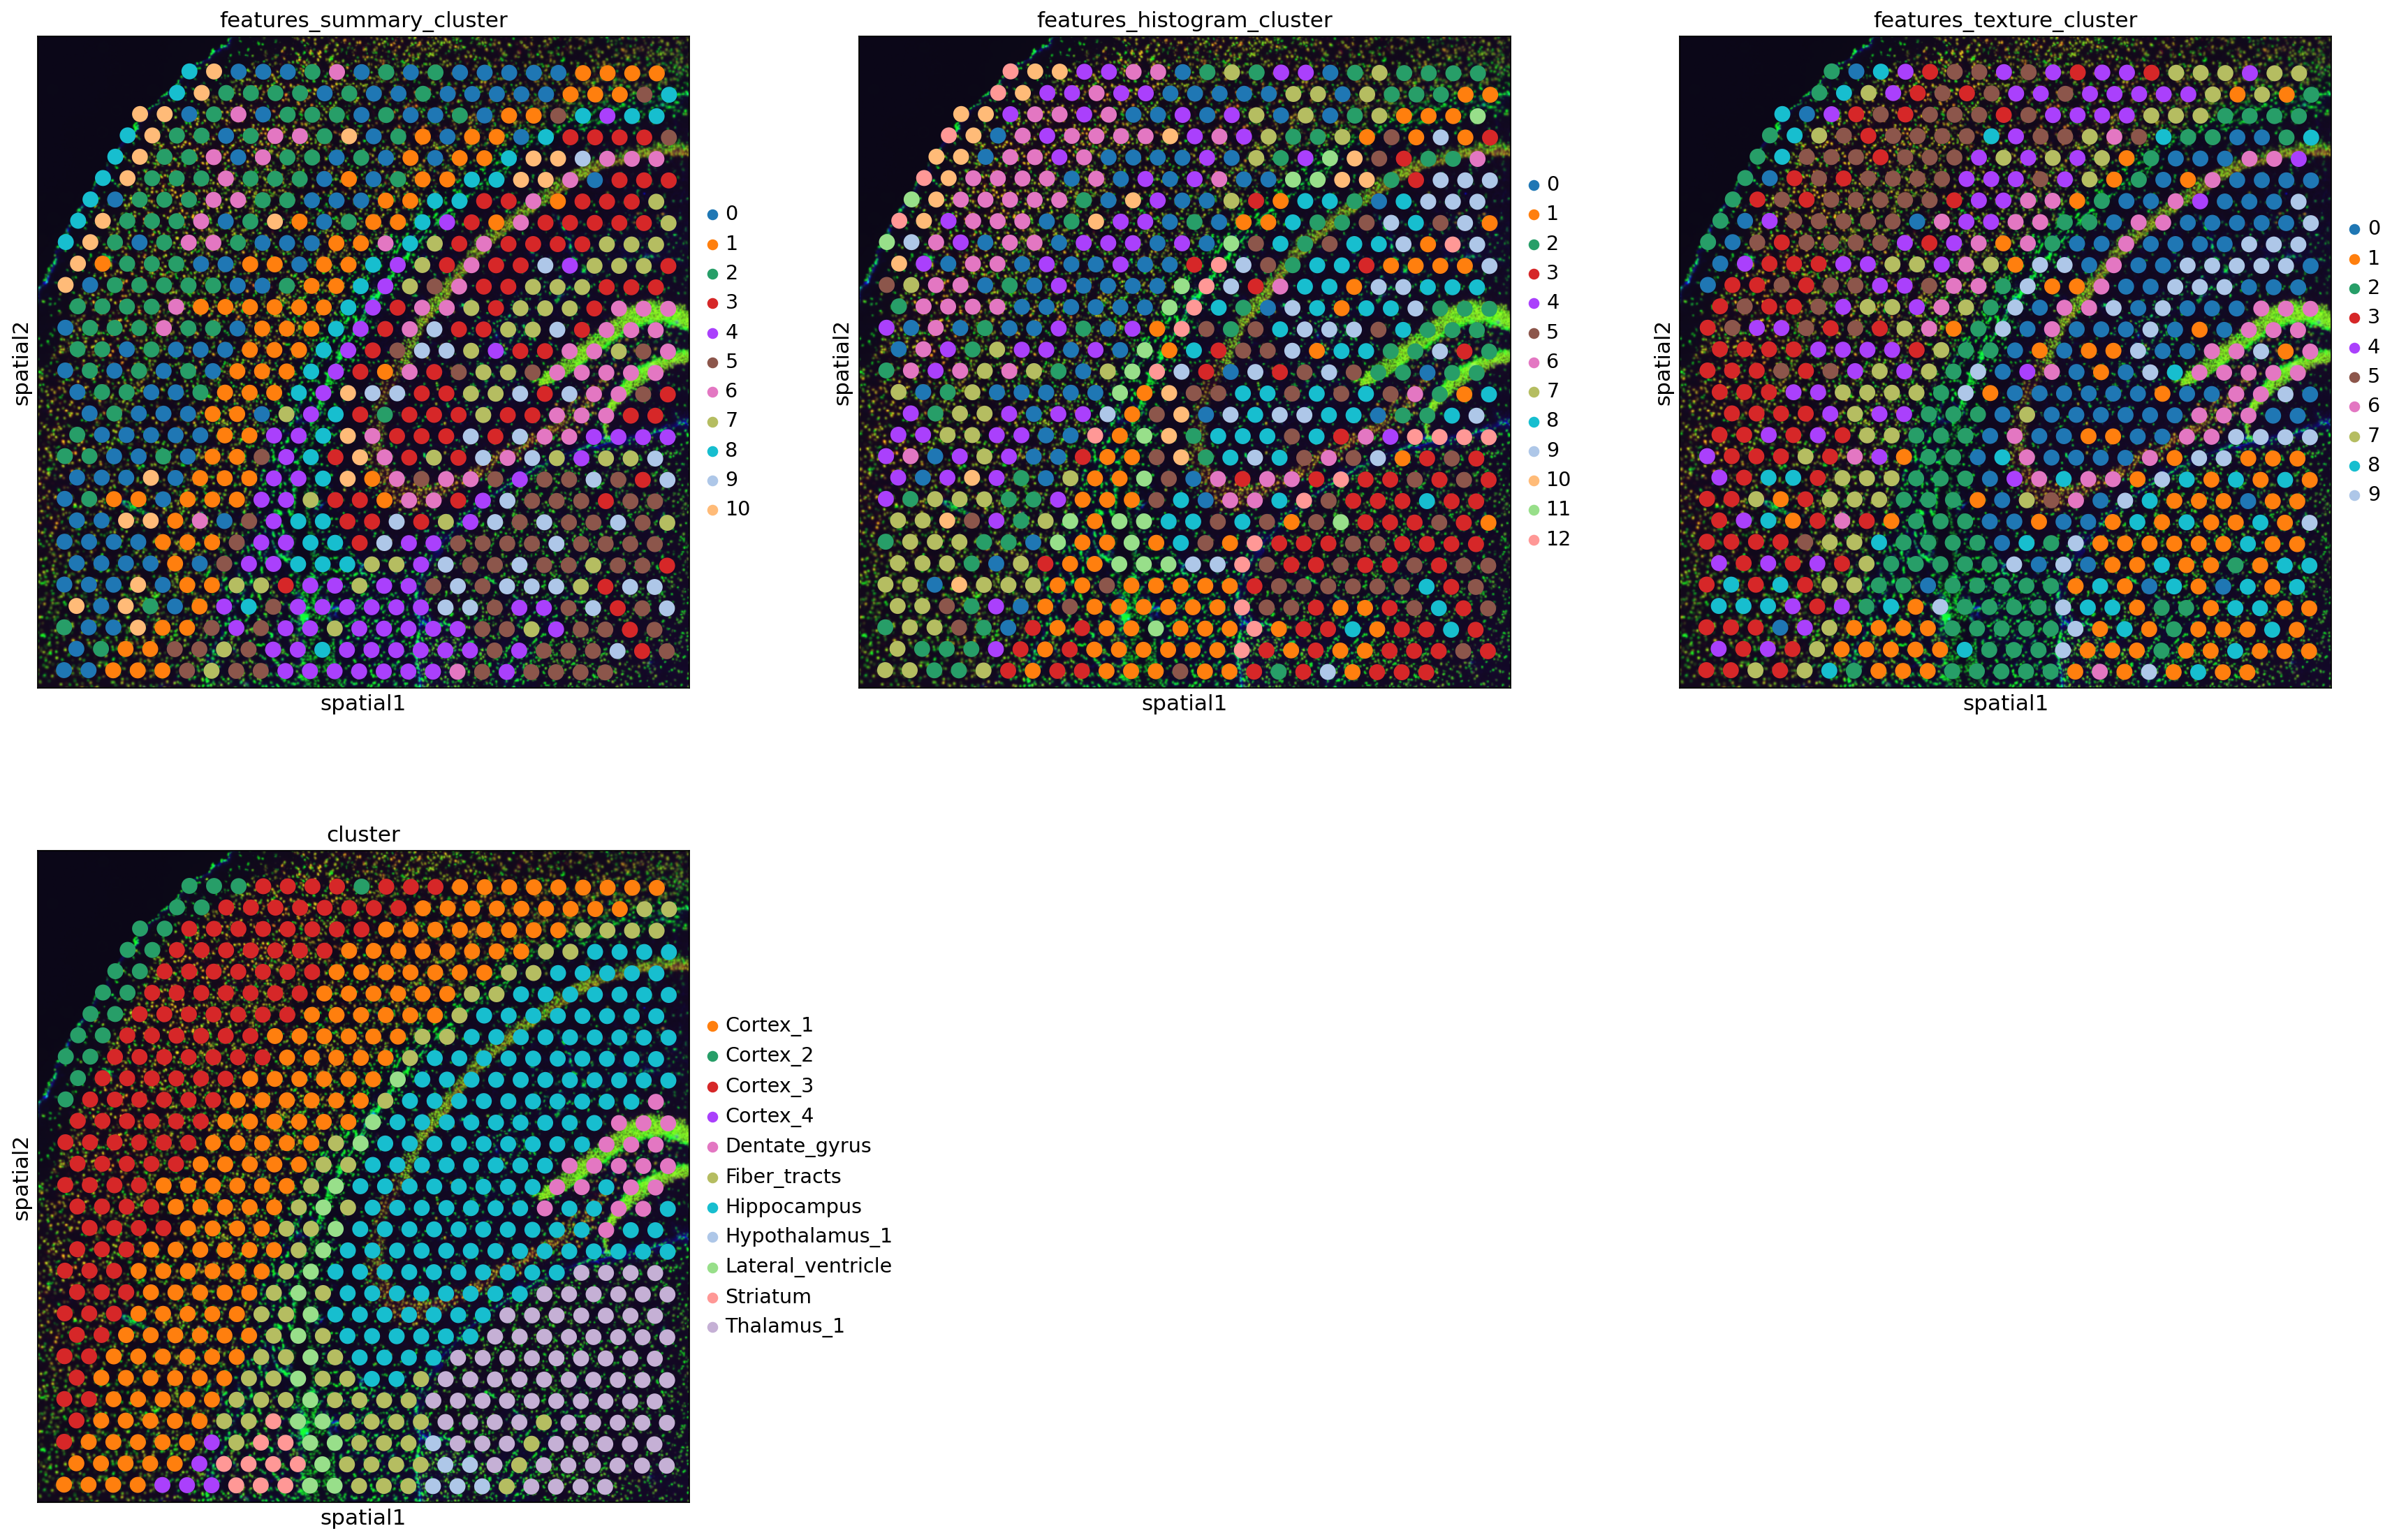

In [23]:
adata.obs["features_summary_cluster"] = cluster_features(
    adata.obsm["features"], like="summary"
)
adata.obs["features_histogram_cluster"] = cluster_features(
    adata.obsm["features"], like="histogram"
)
adata.obs["features_texture_cluster"] = cluster_features(
    adata.obsm["features"], like="texture"
)

sc.set_figure_params(facecolor="white", figsize=(8, 8))
sq.pl.spatial_scatter(
    adata,
    color=[
        "features_summary_cluster",
        "features_histogram_cluster",
        "features_texture_cluster",
        "cluster",
    ],
    ncols=3,
)